In [1]:
# lib imports
import os
import time
import tqdm
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import json
import joblib
import sklearn
from sklearn.impute import SimpleImputer
from scipy.stats.contingency import crosstab
import argparse
from sklearn import preprocessing

# custom imports
sys.path.append(os.path.expanduser('~'))
sys.path.append(os.getcwd())
from functions.load_model import load_tolist
import functions.process as proc
from functions.io import setup_logger, makedir
from functions.read_write import NpIntEncoder
from functions import FeatureEngine
from functions.plots_prediction import ethogram_plotter, CLtrajectory_plotter, transition_plotter
import functions.algebra as al

In [52]:
# %% SETTINGS
# set invalid (division by zero error) to ignore
np.seterr(invalid='ignore')
date = time.strftime("%Y%m%d")
datestr = time.strftime("%Y%m%d-%HH%MM")
newline = '\n'
sklearn.set_config(transform_output="pandas")


# %% Configuration
config = yaml.safe_load(open("config.yml", "r"))

config_batch_path = "config_batch.yml"
config_batch = yaml.safe_load(open(config_batch_path, "r"))
# %% INPUT
list_inpath_pattern = config_batch['Experiments'][config_batch['Settings']['run']]['conditions']

# recording
fps = config['settings']['fps']

# path
inpath = config['path']['PharaGlow data']
inpath_with_subfolders = config['path']['with subfolders']

# coloring and labels
cluster_color = config['cluster_color']
cluster_label = config['cluster_labels']
skip_already = config['settings']['skip_already']

for inpath_pattern in list_inpath_pattern:
    # %% I/O
    # create list of inpath from folders in inpath that folder names contain inpath_pattern
    if inpath_with_subfolders:
        new_inpath = [os.path.join(inpath, sub) for sub in os.listdir(inpath) if inpath_pattern in sub]
    else:
        new_inpath = [inpath]
    outpath = f'/gpfs/soma_fs/home/boeger/PpaPred/temp/{inpath_pattern}'


In [53]:
base_outpath = makedir(outpath)
outpath = []
for p in new_inpath:
    in_folder = os.path.basename(p)
    outpath.append(makedir(os.path.abspath(os.path.join(base_outpath,in_folder))))

In [ ]:
XYs, CLines  = FeatureEngine.run(new_inpath, 
                                 outpath,
                                 return_XYCLine = True, 
                                 skip_engine = False, 
                                 skip_already=False, 
                                 out_fn_suffix='features',
                                 inpath_with_subfolders=inpath_with_subfolders)

  0%|          | 0/104 [00:00<?, ?it/s]

feature calculation for L176_240502_L176_results_34.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6953)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 619,  620,  621, 3907]),)
Ffill-Interpolation of nan frames


  1%|          | 1/104 [00:03<05:24,  3.15s/it]



feature calculation for L176_240502_L176_results_8.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 10499)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([7278, 7291, 9973]),)
split 1, range: (10500, 10546)
Ffill-Interpolation of nan frames


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
  2%|▏         | 2/104 [00:07<06:40,  3.93s/it]



feature calculation for L176_240502_L176_results_164.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 276)
split 1, range: (448, 505)
split 2, range: (567, 1053)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (1078, 1183)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (1199, 3073)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1319, 1325, 1328, 1329, 1741]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(276, 448) (over 1 sec long)
Exempted from interpolation: range(505, 567) (over 1 sec long)


  3%|▎         | 3/104 [00:09<04:50,  2.87s/it]



feature calculation for L176_240502_L176_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1995)


  4%|▍         | 4/104 [00:10<03:30,  2.10s/it]

Ffill-Interpolation of nan frames


feature calculation for L176_240502_L176_results_115.json_labeldata.csv
Area larger than threshold, collision assumed in [range(6933, 6943), range(6944, 6978), range(7126, 7147), range(7148, 7151), range(7155, 7164)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (6, 5779)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 380, 1835, 5752, 5753, 5755, 5756, 5757, 5762, 5763, 5764, 5765,
       5768, 5770, 5771]),)
split 1, range: (5780, 6933)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  2,   3,   4,   5,   6,   8,   9,  10,  13,  17,  18,  19,  20,
        21,  22,  23,  27,  47,  50,  52,  53,  59,  60,  61,  62,  63,
       740, 916, 917, 945, 946, 947, 955, 956, 957, 958, 959, 960, 961,
       962, 963, 964]),)
split 2, range: (6978, 7126)
split 3, range: (7164, 7199)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(6933, 6978) (over 1 sec long)
Exempted from interpolation: range(7126, 7164) (over 1 sec long)


  5%|▍         | 5/104 [00:13<04:11,  2.54s/it]



feature calculation for L176_240502_L176_results_25.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 11581)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 734,  736,  737,  738,  739,  740,  741,  742,  743,  745,  747,
        748,  749,  751,  770, 6563, 6565, 6566, 6567, 6568, 6569, 6570,
       6577, 6580, 6581, 6582, 6978, 6984]),)
Ffill-Interpolation of nan frames


  6%|▌         | 6/104 [00:18<05:23,  3.30s/it]



feature calculation for L176_240502_L176_results_130.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (39, 627)
split 1, range: (632, 980)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (1000, 1499)
split 3, range: (1524, 1560)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (1889, 1928)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (1933, 2006)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 39) (over 1 sec long)
Exempted from interpolation: range(1560, 1889) (over 1 sec long)
Exempted from interpolation: range(2006, 2043) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
  7%|▋         | 7/104 [00:19<04:14,  2.62s/it]



feature calculation for L176_240502_L176_results_114.json_labeldata.csv
Area larger than threshold, collision assumed in [range(7150, 7156)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (6, 109)
split 1, range: (188, 7150)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([5457, 6207, 6457, 6458, 6459, 6460, 6461, 6462, 6463, 6464, 6465,
       6466, 6467, 6468, 6623, 6624, 6625, 6626, 6627, 6628, 6629, 6631,
       6632, 6634, 6635, 6636, 6637, 6638, 6639, 6640, 6641, 6642, 6643,
       6644]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (7156, 7199)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(109, 188) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
  8%|▊         | 8/104 [00:22<04:27,  2.79s/it]



feature calculation for L176_240502_L176_results_38.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2649)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  48,   49,   50, ..., 2646, 2647, 2648]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


  9%|▊         | 9/104 [00:23<03:38,  2.30s/it]



feature calculation for L176_240502_L176_results_91.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2730)
Ffill-Interpolation of nan frames


 10%|▉         | 10/104 [00:25<03:04,  1.96s/it]



feature calculation for L176_240502_L176_results_28.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4477)
Ffill-Interpolation of nan frames


 11%|█         | 11/104 [00:26<03:00,  1.94s/it]



feature calculation for L176_240502_L176_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1851)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([84]),)


 12%|█▏        | 12/104 [00:27<02:28,  1.61s/it]

Ffill-Interpolation of nan frames


feature calculation for L176_240502_L176_results_11.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4175)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 944, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113,
       3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124,
       3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135,
       3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146,
       3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157,
       3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168,
       3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179,
       3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190,
       3191, 3192, 3193, 3194, 

 12%|█▎        | 13/104 [00:29<02:33,  1.69s/it]



feature calculation for L176_240502_L176_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [range(7191, 7192), range(7194, 7196)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 46)
split 1, range: (100, 141)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (232, 385)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (387, 714)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (720, 794)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (852, 2822)
split 6, range: (2860, 4063)
split 7, range: (4064, 4103)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 8, range: (4141, 4176)
split 9, range: (4221, 7183)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([665]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

Ffill-Interpolation of nan frames
Exempted from interpolation: range(46, 100) (over 1 sec long)
Exempted from interpolation: range(141, 232) (over 1 sec long)
Exempted from interpolation: range(794, 852) (over 1 sec long)
Exempted from interpolation: range(2822, 2860) (over 1 sec long)
Exempted from interpolation: range(4103, 4141) (over 1 sec long)
Exempted from interpolation: range(4176, 4221) (over 1 sec long)


 13%|█▎        | 14/104 [00:33<03:29,  2.33s/it]



feature calculation for L176_240502_L176_results_12.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2902)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2331, 2519]),)
Ffill-Interpolation of nan frames


 14%|█▍        | 15/104 [00:34<02:59,  2.01s/it]



feature calculation for L176_240502_L176_results_128.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (22, 6890)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 499,  501,  503,  506,  507,  508,  510, 1145, 1150, 2922, 2923,
       2925, 2926, 2927, 2928, 4713, 4773, 6317]),)
Ffill-Interpolation of nan frames


 15%|█▌        | 16/104 [00:37<03:19,  2.27s/it]



feature calculation for L176_240502_L176_results_0.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  431,   433, 11928, 11930, 11937]),)
Ffill-Interpolation of nan frames


 16%|█▋        | 17/104 [00:45<05:32,  3.82s/it]



feature calculation for L176_240516_L176bis_results_63.json_labeldata.csv
Area larger than threshold, collision assumed in [range(20, 21), range(61, 62), range(867, 898), range(900, 901), range(904, 909), range(910, 911), range(916, 917), range(941, 942), range(944, 945), range(946, 993), range(994, 996), range(1000, 1001), range(1004, 1006), range(1078, 1079), range(1084, 1086), range(1112, 1156), range(1157, 1167), range(1183, 1189), range(1190, 1213), range(1220, 1221), range(1231, 1232), range(1236, 1240), range(1241, 1283), range(1284, 1285), range(1563, 1564)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (21, 61)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1]),)
split 1, range: (62, 272)
split 2, range: (273, 572)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (574, 609)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (610, 867)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([229]),)
split 5, range: (1006, 1078)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 6, range: (1285, 1563)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([265, 266, 267, 268]),)
split 7, range: (1564, 2881)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(867, 1006) (over 1 sec long)
Exempted from interpolation: range(1078, 1285) (over 1 sec long)


 17%|█▋        | 18/104 [00:47<04:42,  3.29s/it]



feature calculation for L176_240516_L176bis_results_16.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (122, 2342)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 1, range: (2347, 3370)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (3382, 3448)
split 3, range: (3463, 6673)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2145]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (6674, 7558)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 122) (over 1 sec long)


 18%|█▊        | 19/104 [00:50<04:44,  3.35s/it]



feature calculation for L176_240516_L176bis_results_104.json_labeldata.csv
Area larger than threshold, collision assumed in [range(4969, 4970), range(5007, 5008), range(5026, 5027), range(5033, 5034), range(5038, 5039), range(5042, 5047), range(5048, 5053), range(5054, 5056), range(5057, 5059), range(5060, 5063), range(5064, 5075), range(5095, 5099), range(5107, 5110), range(5119, 5120), range(5662, 5663), range(5664, 5667)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 826)
split 1, range: (834, 1958)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (1979, 4969)
split 3, range: (4970, 5007)
split 4, range: (5120, 5662)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(5007, 5120) (over 1 sec long)
Exempted from interpolation: range(5662, 5693) (over 1 sec long)


 19%|█▉        | 20/104 [00:53<04:24,  3.15s/it]



feature calculation for L176_240516_L176bis_results_190.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2491, 2492)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2376)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1141, 1165, 1586, 1588, 1767, 1768, 1770, 1774, 1780]),)
split 1, range: (2412, 2491)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(2376, 2412) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 20%|██        | 21/104 [00:54<03:34,  2.58s/it]



feature calculation for L176_240516_L176_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2591)
split 1, range: (2628, 3037)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([183, 211, 212, 213, 214, 217, 219, 239, 240, 241, 242, 243, 247,
       249]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(2591, 2628) (over 1 sec long)


 21%|██        | 22/104 [00:55<03:03,  2.23s/it]



feature calculation for L176_240516_L176bis_results_14.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 2), range(72, 95), range(96, 103), range(127, 150), range(152, 154), range(159, 278), range(340, 341), range(352, 353), range(354, 357), range(358, 517), range(519, 559), range(630, 632), range(933, 936), range(938, 955), range(956, 964), range(965, 968), range(973, 978), range(981, 987), range(1043, 1045), range(1091, 1092), range(1099, 1100), range(1101, 1102), range(1110, 1111), range(1112, 1114), range(1120, 1124), range(1130, 1131), range(1133, 1134), range(1656, 1657), range(1659, 1661), range(1740, 1742), range(1743, 1744), range(1746, 1747), range(2352, 2353), range(2367, 2368), range(2379, 2380), range(2390, 2392), range(2399, 2400), range(2401, 2402), range(2414, 2416), range(2424, 2425), range(2445, 2447), range(2450, 2452), range(2506, 2507), range(2604, 2607), range(2624, 2627), range(2628, 2638), range(2694, 2695), range(2696, 2717), range

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (632, 821)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1,  2,  3, 43, 45, 46, 47, 48, 49]),)
split 4, range: (852, 884)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (886, 920)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 6, range: (987, 1043)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([16, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 7, range: (1045, 1091)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1, 3, 4, 5, 6]),)
split 8, range: (1134, 1656)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 9, range: (1661, 1740)
split 10, range: (1747, 2045)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 11, range: (2056, 2352)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 12, range: (2452, 2506)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 13, range: (2507, 2553)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 14, range: (2638, 2694)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 15, range: (2776, 2811)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 16, range: (2877, 2980)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([50, 53]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 17, range: (3028, 3080)
split 18, range: (3086, 3155)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 37) (over 1 sec long)
Exempted from interpolation: range(72, 278) (over 1 sec long)
Exempted from interpolation: range(340, 559) (over 1 sec long)
Exempted from interpolation: range(821, 852) (over 1 sec long)
Exempted from interpolation: range(920, 987) (over 1 sec long)
Exempted from interpolation: range(1091, 1134) (over 1 sec long)
Exempted from interpolation: range(2352, 2452) (over 1 sec long)
Exempted from interpolation: range(2553, 2638) (over 1 sec long)
Exempted from interpolation: range(2694, 2776) (over 1 sec long)
Exempted from interpolation: range(2811, 2877) (over 1 sec long)
Exempted from interpolation: range(2980, 3028) (over 1 sec long)
Exempted from interpolation: range(3155, 3193) (over 1 sec long)


 22%|██▏       | 23/104 [00:58<03:08,  2.32s/it]



feature calculation for L176_240516_L176_results_66.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1548, 1556)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (62, 236)
split 1, range: (262, 310)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (391, 812)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (842, 1033)
split 4, range: (1043, 1420)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (1445, 1548)
split 6, range: (1556, 1753)
split 7, range: (1779, 2088)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 8, range: (2091, 2919)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 9, range: (2920, 5854)
split 10, range: (5859, 6475)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 62) (over 1 sec long)
Exempted from interpolation: range(310, 391) (over 1 sec long)
Exempted from interpolation: range(6475, 6533) (over 1 sec long)


 23%|██▎       | 24/104 [01:02<03:37,  2.72s/it]



feature calculation for L176_240516_L176_results_384.json_labeldata.csv
Area larger than threshold, collision assumed in [range(9, 19), range(21, 22), range(428, 429), range(436, 441), range(454, 457), range(1319, 1335), range(3193, 3201)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (22, 428)
split 1, range: (457, 1319)
split 2, range: (1335, 3193)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(3193, 3231) (over 1 sec long)


 24%|██▍       | 25/104 [01:03<03:09,  2.39s/it]



feature calculation for L176_240516_L176bis_results_182.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 5249)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([3703, 3704, 4791, 4792, 4793, 4794, 4795, 4796, 4797, 4798, 4799,
       4800, 4801, 4802, 4803, 4804, 4805, 4806, 4807, 4808, 4809, 4810,
       4811, 4812, 4813, 4814, 4815, 4816, 4817, 4818, 4819, 4820, 4821,
       4822, 4823, 4824, 4825, 4826, 4827, 4828, 4829, 4830, 4832, 4836,
       4837, 4844, 4846, 4848, 4849, 4850, 4852, 4853, 4856, 4858, 4860,
       4861, 4863, 4866, 4869, 4872, 4883, 4884, 4885, 4886, 4887, 4888,
       4889, 4890, 4891, 4892, 4921]),)
Ffill-Interpolation of nan frames


 25%|██▌       | 26/104 [01:06<03:04,  2.36s/it]



feature calculation for L176_240516_L176_results_250.json_labeldata.csv
Area larger than threshold, collision assumed in [range(27, 65), range(1291, 1297), range(1298, 1302)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (82, 734)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([481]),)
split 1, range: (740, 1291)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (1302, 2057)


 26%|██▌       | 27/104 [01:07<02:32,  1.98s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 82) (over 1 sec long)


feature calculation for L176_240516_L176bis_results_37.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 607)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([31, 32, 33, 66]),)
split 1, range: (608, 698)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (711, 820)
split 3, range: (821, 2226)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1404]),)


 27%|██▋       | 28/104 [01:08<02:15,  1.78s/it]

Ffill-Interpolation of nan frames


feature calculation for L176_240516_L176bis_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 7968)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2842, 2862, 2869, 2881, 2914, 2915, 2931, 2932, 2956, 2998, 3032,
       3033, 3078, 3079, 3082, 3089, 3105, 3155, 3196, 3211, 5667, 5669,
       5673, 5675, 5677, 5678, 5680, 5681, 5683, 5685, 5688, 5693, 5699,
       5718, 5847, 5848, 5849, 5850, 5851, 5852, 6991, 7001]),)
Ffill-Interpolation of nan frames


 28%|██▊       | 29/104 [01:11<02:48,  2.25s/it]



feature calculation for L176_240516_L176_results_418.json_labeldata.csv
Area larger than threshold, collision assumed in [range(88, 95), range(1966, 1980)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 88)
split 1, range: (95, 982)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (1014, 1966)


 29%|██▉       | 30/104 [01:12<02:20,  1.90s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(982, 1014) (over 1 sec long)


feature calculation for L176_240516_L176_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1716, 1723)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1469)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([443, 460, 462, 463, 464, 467, 471]),)
split 1, range: (1485, 1716)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (1723, 1800)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([74, 75, 76]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (1814, 2305)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames


 30%|██▉       | 31/104 [01:14<02:06,  1.74s/it]



feature calculation for L176_240516_L176bis_results_168.json_labeldata.csv
Area larger than threshold, collision assumed in [range(3889, 3909), range(3910, 3943)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (60, 3889)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 137,  201,  202,  225, 1721, 1735, 1736, 1737, 1868, 1870, 1871,
       1872]),)
split 1, range: (3943, 5094)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  6,  29,  30, 561, 572, 573, 611, 659, 689, 690, 691, 736, 832,
       833, 834, 835, 836, 837, 838, 839]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 60) (over 1 sec long)
Exempted from interpolation: range(3889, 3943) (over 1 sec long)


 31%|███       | 32/104 [01:16<02:15,  1.89s/it]



feature calculation for L176_240516_L176_results_416.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 18), range(115, 117), range(1985, 1997), range(1998, 1999), range(2017, 2018), range(2019, 2020)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (18, 115)
split 1, range: (117, 1985)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 32%|███▏      | 33/104 [01:17<01:55,  1.62s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(1985, 2020) (over 1 sec long)


feature calculation for L176_240516_L176_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [range(4314, 4322), range(4606, 4614), range(7210, 7216), range(7224, 7229), range(7231, 7233), range(7235, 7237)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4314)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  12,   13,   20, ..., 4311, 4312, 4313]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (4322, 4606)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([25, 26, 27]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, rang

 33%|███▎      | 34/104 [01:21<02:40,  2.29s/it]



feature calculation for L176_240516_L176_results_23.json_labeldata.csv
Area larger than threshold, collision assumed in [range(3462, 3469), range(11033, 11037), range(11038, 11039), range(12322, 12352), range(12353, 12354), range(13197, 13199), range(13207, 13208), range(13209, 13255), range(13280, 13291), range(13292, 13294), range(13703, 13704), range(13706, 13707), range(13711, 13717), range(13725, 13733), range(14594, 14606), range(14607, 14608), range(16468, 16469), range(16470, 16479)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3462)
split 1, range: (3469, 11033)
split 2, range: (11039, 12322)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (12354, 13197)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (13294, 13703)
split 5, range: (13733, 14594)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 6, range: (14608, 16468)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(12322, 12354) (over 1 sec long)
Exempted from interpolation: range(13197, 13294) (over 1 sec long)


 34%|███▎      | 35/104 [01:28<04:22,  3.80s/it]



feature calculation for L176_240807_L176_results_0.json_labeldata.csv
Area larger than threshold, collision assumed in [range(374, 377), range(378, 379), range(382, 383), range(387, 389), range(390, 405), range(406, 418), range(552, 553), range(554, 555), range(557, 558), range(559, 563), range(564, 566), range(567, 568), range(569, 570), range(572, 597), range(636, 637), range(638, 639), range(776, 777), range(786, 787), range(788, 797), range(798, 799), range(801, 802), range(3847, 3848), range(3859, 3860), range(4051, 4052), range(4380, 4381), range(5071, 5072), range(5073, 5074), range(5077, 5081), range(5082, 5083), range(5084, 5090), range(5091, 5092), range(5093, 5094), range(5095, 5097), range(5098, 5109)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 374)
split 1, range: (418, 552)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward trave

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 2, range: (597, 636)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (639, 776)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (802, 3847)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (3860, 4044)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([28, 29, 30]),)
split 6, range: (4068, 4380)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 7, range: (4381, 5071)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([436]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(374, 418) (over 1 sec long)
Exempted from interpolation: range(552, 597) (over 1 sec long)
Exempted from interpolation: range(5071, 5113) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 35%|███▍      | 36/104 [01:31<03:59,  3.52s/it]



feature calculation for L176_240424_L176_results_7.json_labeldata.csv
Area larger than threshold, collision assumed in [range(64, 65), range(66, 73), range(74, 87), range(88, 96), range(97, 98), range(99, 100), range(101, 102), range(105, 106), range(108, 109), range(110, 111), range(112, 113), range(114, 119), range(120, 121), range(122, 130), range(131, 136), range(137, 138), range(143, 144), range(145, 146), range(147, 148), range(153, 154), range(155, 156), range(157, 158), range(159, 160), range(166, 167), range(174, 175), range(176, 177), range(180, 181), range(182, 197), range(198, 199), range(200, 201), range(202, 203), range(204, 205), range(209, 210), range(213, 214), range(215, 216), range(217, 218), range(223, 224), range(587, 593), range(594, 602), range(616, 618), range(625, 627), range(650, 652), range(658, 666), range(667, 668), range(669, 670), range(671, 672), range(673, 674), range(675, 676), range(677, 678), range(679, 680), range(1414, 1420), range(1421, 1422), r

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (680, 1414)
split 3, range: (1526, 4255)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1460]),)
split 4, range: (4261, 4421)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(64, 224) (over 1 sec long)
Exempted from interpolation: range(587, 680) (over 1 sec long)
Exempted from interpolation: range(1414, 1526) (over 1 sec long)
Exempted from interpolation: range(4421, 4525) (over 1 sec long)


 36%|███▌      | 37/104 [01:33<03:28,  3.12s/it]



feature calculation for L176_240424_L176_results_252.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1473, 1474), range(1475, 1495), range(1496, 1497), range(1498, 1499), range(1502, 1509), range(1510, 1513), range(1514, 1517), range(1518, 1523), range(1524, 1538), range(1548, 1549), range(1551, 1572), range(1573, 1614), range(1636, 1637), range(1638, 1640), range(1641, 1684), range(1685, 1688), range(1689, 1691), range(1694, 1695), range(1696, 1697), range(1701, 1702), range(1703, 1724), range(1725, 1727), range(1728, 1731), range(1732, 1733), range(1736, 1737), range(1743, 1745), range(1746, 1749), range(1751, 1752), range(1754, 1755), range(1758, 1759), range(1760, 1761), range(1762, 1764), range(1768, 1769), range(1773, 1774), range(1780, 1781), range(1784, 1785), range(1793, 1795), range(1801, 1802), range(1803, 1804), range(1805, 1806), range(1808, 1809), range(1814, 1815), range(1818, 1819), range(1821, 1823), range(1825, 1827), range(1831, 1832), ra

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (2637, 3945)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([777]),)
split 4, range: (3975, 4981)
split 5, range: (4984, 5370)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1,  4,  6,  8, 11, 14, 15]),)
split 6, range: (5383, 10376)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  27,   28,   29, ..., 3263, 3264, 3265]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1473, 1862) (over 1 sec long)
Exempted from interpolation: range(2196, 2320) (over 1 sec long)
Exempted from interpolation: range(2596, 2637) (over 1 sec long)


 37%|███▋      | 38/104 [01:38<03:58,  3.61s/it]



feature calculation for L176_240424_L176_results_231.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2488, 2519), range(2520, 2521), range(2522, 2523), range(2526, 2533), range(2534, 2537), range(2538, 2541), range(2542, 2547), range(2548, 2640), range(2641, 2642), range(2657, 2748), range(2749, 2751), range(2752, 2755), range(2756, 2757), range(2760, 2761), range(2767, 2769), range(2770, 2773), range(2775, 2776), range(2778, 2779), range(2782, 2783), range(2784, 2785), range(2786, 2788), range(2792, 2793), range(2797, 2798), range(2804, 2805), range(2808, 2809), range(2817, 2819), range(2825, 2826), range(2827, 2828), range(2829, 2830), range(2832, 2833), range(2838, 2839), range(2842, 2843), range(2845, 2847), range(2849, 2851), range(2855, 2856), range(2858, 2860), range(2862, 2863), range(2871, 2873), range(2877, 2878), range(2885, 2886), range(3220, 3221), range(3230, 3231), range(3234, 3235), range(3236, 3238), range(3239, 3246), range(3247, 3344), ra

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (464, 953)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 2,  3,  4, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 45, 49, 50,
       51, 52, 53, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 77, 78]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (967, 1009)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (1018, 2488)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 646,  707,  708,  710,  711,  712,  713,  714,  784,  819,  850,
        851,  852,  853,  854,  856,  857,  858,  859,  935,  962,  971,
        972,  973, 1125, 1130]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (2886, 3220)
split 6, range: (3344, 3620)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 7, range: (3672, 4787)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 8, range: (5057, 5174)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 9, range: (5175, 6586)
split 10, range: (6600, 6795)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([20]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 11, range: (6813, 7011)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 12, range: (7031, 8115)
split 13, range: (8124, 8287)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([157, 158, 159]),)
split 14, range: (8305, 8380)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(2488, 2886) (over 1 sec long)
Exempted from interpolation: range(3220, 3344) (over 1 sec long)
Exempted from interpolation: range(3620, 3672) (over 1 sec long)
Exempted from interpolation: range(4787, 5057) (over 1 sec long)
Exempted from interpolation: range(8380, 8422) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 38%|███▊      | 39/104 [01:43<04:12,  3.89s/it]



feature calculation for L176_240424_L176_results_325.json_labeldata.csv
Area larger than threshold, collision assumed in [range(69, 70), range(80, 86)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 69)
split 1, range: (86, 2733)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 5,  8,  9, 10, 15, 16, 17, 18, 19, 70, 71, 72]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (2754, 7582)
split 3, range: (7613, 7819)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(7582, 7613) (over 1 sec long)


 38%|███▊      | 40/104 [01:46<04:02,  3.78s/it]



feature calculation for L176_240424_L176_results_292.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (40, 107)
split 1, range: (113, 169)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (219, 295)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (298, 464)
split 4, range: (630, 680)
split 5, range: (719, 760)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1,  3,  4,  5,  6,  8, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 6, range: (765, 1030)
split 7, range: (1140, 8510)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 577,  578,  579, ..., 7367, 7368, 7369]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 40) (over 1 sec long)
Exempted from interpolation: range(169, 219) (over 1 sec long)
Exempted from interpolation: range(464, 630) (over 1 sec long)
Exempted from interpolation: range(680, 719) (over 1 sec long)
Exempted from interpolation: range(1030, 1140) (over 1 sec long)


 39%|███▉      | 41/104 [01:50<04:03,  3.86s/it]



feature calculation for L176_240424_L176_results_272.json_labeldata.csv
Area larger than threshold, collision assumed in [range(620, 624), range(625, 626), range(689, 691), range(692, 693), range(695, 696), range(697, 699), range(700, 702), range(721, 722), range(723, 728), range(755, 759), range(787, 788), range(789, 791), range(792, 796), range(797, 802), range(806, 808), range(811, 812), range(813, 818), range(819, 820), range(821, 823), range(824, 829), range(830, 832), range(833, 834), range(835, 836), range(838, 841), range(842, 852), range(853, 854), range(1366, 1367), range(1385, 1386), range(1387, 1398), range(1399, 1402), range(1410, 1411), range(1412, 1432), range(1433, 1449), range(1450, 1464), range(1777, 1779), range(1791, 1797), range(2920, 2921), range(2922, 2927), range(2929, 2931), range(2934, 2935), range(2942, 2943), range(2957, 2958), range(2963, 2964), range(2987, 2988), range(2994, 2998), range(2999, 3000), range(3001, 3005), range(3006, 3010), range(3011, 3028

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (854, 1251)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([187]),)
split 3, range: (1271, 1366)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (1633, 1777)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (1797, 2920)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([331, 332, 334, 335, 351, 359, 360, 361, 362, 363, 364, 394, 396,
       398, 403, 407, 461, 464, 468, 469, 498, 499, 502, 503, 504, 505,
       506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 522, 678,
       679, 681, 711]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(689, 854) (over 1 sec long)
Exempted from interpolation: range(1366, 1633) (over 1 sec long)
Exempted from interpolation: range(2920, 3028) (over 1 sec long)


 40%|████      | 42/104 [01:52<03:17,  3.19s/it]



feature calculation for L176_240424_L176_results_206.json_labeldata.csv
Area larger than threshold, collision assumed in [range(76, 77), range(3170, 3189)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (22, 76)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (77, 3170)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames


 41%|████▏     | 43/104 [01:53<02:43,  2.68s/it]



feature calculation for L176_240424_L176_results_164.json_labeldata.csv
Area larger than threshold, collision assumed in [range(316, 317), range(320, 322), range(1689, 1690), range(1730, 1732), range(1733, 1734), range(1747, 1748), range(2163, 2175)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (2, 316)
split 1, range: (322, 1517)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 2, range: (1544, 1689)
split 3, range: (1690, 1730)
split 4, range: (1748, 2163)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 42%|████▏     | 44/104 [01:55<02:16,  2.27s/it]

Ffill-Interpolation of nan frames


feature calculation for L176_240424_L176_results_280.json_labeldata.csv
Area larger than threshold, collision assumed in [range(96, 98), range(99, 100), range(101, 102), range(105, 112), range(143, 144), range(145, 147), range(148, 149), range(245, 246), range(286, 287), range(288, 290), range(310, 312), range(417, 418), range(858, 859), range(860, 923), range(1199, 1200), range(1201, 1202), range(1204, 1205), range(1208, 1209), range(1210, 1212), range(1213, 1214), range(1215, 1243), range(2548, 2549), range(2557, 2558), range(2577, 2578)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 96)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (112, 143)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (246, 286)
split 4, range: (312, 417)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 41, 42, 43, 44, 45, 46, 48, 49,
       50, 51, 52, 55, 62, 73, 74, 75, 76, 77, 78, 79, 94, 95, 96, 97, 98,
       99]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (418, 529)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 6, range: (530, 603)
split 7, range: (609, 771)
split 8, range: (811, 858)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 9, range: (923, 1097)
split 10, range: (1098, 1199)
split 11, range: (1243, 2548)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([192, 193, 198, 199, 200, 201, 202, 203, 204]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 12, range: (2578, 2725)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 13, range: (2755, 6303)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(211, 246) (over 1 sec long)
Exempted from interpolation: range(771, 811) (over 1 sec long)
Exempted from interpolation: range(858, 923) (over 1 sec long)
Exempted from interpolation: range(1199, 1243) (over 1 sec long)


 43%|████▎     | 45/104 [01:58<02:36,  2.66s/it]



feature calculation for L176_240424_L176bis_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [range(4452, 4453), range(4520, 4521), range(4523, 4524), range(4529, 4530), range(4538, 4539), range(4541, 4543), range(4546, 4548)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4452)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1322, 1323, 1324, 1325, 1349, 1352, 1478]),)
split 1, range: (4453, 4520)
split 2, range: (4548, 11193)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  49, 1920, 2565, ..., 6642, 6643, 6644]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (11194, 11304)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 44%|████▍     | 46/104 [02:03<03:15,  3.36s/it]



feature calculation for L176_240424_L176_results_6.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 1), range(2, 5), range(6, 7), range(8, 11), range(12, 62), range(63, 64), range(65, 66), range(98, 99), range(652, 656), range(657, 658), range(1452, 1453), range(1524, 1525), range(1526, 1565), range(1566, 1568), range(1577, 1578), range(2042, 2044), range(2046, 2047), range(2048, 2055)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (66, 98)
split 1, range: (99, 652)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (658, 1452)
split 3, range: (1453, 1524)
split 4, range: (1578, 2042)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (2055, 2364)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([257, 258]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 66) (over 1 sec long)
Exempted from interpolation: range(1524, 1578) (over 1 sec long)


 45%|████▌     | 47/104 [02:05<02:39,  2.79s/it]



feature calculation for L176_240424_L176bis_results_6.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 12064)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 2645,  2646,  2647,  2648,  2649,  2650,  2651,  2652,  2653,
        2654,  2655,  2656,  2657,  2658,  2659,  2660,  2661,  2664,
        2670,  3305,  3306,  3320,  4060,  4061,  4062,  4063,  4064,
        4065,  4066,  4067,  4068,  4069,  4071,  4823,  4825,  7052,
        7053,  7060,  7359,  7362,  7365,  7366,  7367,  7596,  7597,
        7821,  7825, 11436, 11454, 11458, 11459, 11460, 11464, 11465,
       11627, 11629, 11630, 11631, 11641, 11643, 11678]),)
split 1, range: (12065, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 133, 1942, 1943, 1944, 1945, 1946, 1947, 1948,

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames


 46%|████▌     | 48/104 [02:12<03:57,  4.24s/it]



feature calculation for L176_240424_L176_results_260.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1305, 1331), range(1332, 1333), range(1334, 1335), range(1338, 1345), range(1346, 1349), range(1350, 1353), range(1354, 1359), range(1360, 1376), range(1380, 1381), range(1382, 1452), range(1469, 1514), range(1515, 1516), range(1518, 1519), range(1520, 1521), range(1529, 1530), range(1532, 1537), range(1538, 1539), range(1549, 1550), range(1553, 1559), range(1562, 1563), range(1565, 1566), range(1568, 1569), range(1572, 1573), range(1579, 1581), range(1616, 1617), range(1620, 1621), range(1629, 1631), range(1637, 1638), range(1639, 1640), range(1641, 1642), range(1644, 1645), range(1650, 1651), range(1654, 1655), range(1657, 1659), range(1661, 1663), range(1667, 1668), range(1670, 1672), range(1674, 1675), range(1680, 1681), range(1683, 1685), range(1689, 1690), range(1697, 1698), range(1702, 1703), range(1704, 1705), range(1727, 1728), range(1729, 1732), ra

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 1, range: (1581, 1616)
split 2, range: (1736, 2104)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (2108, 2475)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (2482, 2912)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (3039, 3086)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 3,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (3273, 3702)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([5]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 7, range: (3710, 3745)
split 8, range: (3865, 4097)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 9, range: (4102, 4147)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([30]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 10, range: (4177, 4222)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),)
split 11, range: (4242, 4322)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 12, range: (4323, 4383)
split 13, range: (4387, 4578)
split 14, range: (4600, 10210)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1305, 1581) (over 1 sec long)
Exempted from interpolation: range(1616, 1736) (over 1 sec long)
Exempted from interpolation: range(2912, 3039) (over 1 sec long)
Exempted from interpolation: range(3086, 3273) (over 1 sec long)
Exempted from interpolation: range(3745, 3865) (over 1 sec long)


 47%|████▋     | 49/104 [02:17<04:08,  4.52s/it]



feature calculation for L176_240424_L176_results_150.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1549, 1557), range(1560, 1561), range(1573, 1574), range(1575, 1580)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (5, 1549)
split 1, range: (1580, 1752)
split 2, range: (1754, 1942)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


 48%|████▊     | 50/104 [02:19<03:09,  3.51s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(1549, 1580) (over 1 sec long)


feature calculation for L176_240424_L176_results_259.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1308, 1310), range(1311, 1331), range(1332, 1333), range(1334, 1335), range(1338, 1345), range(1346, 1349), range(1350, 1353), range(1354, 1359), range(1360, 1375), range(1384, 1451), range(1470, 1505), range(1506, 1514), range(1515, 1516), range(1518, 1519), range(1520, 1521), range(1529, 1530), range(1532, 1537), range(1538, 1539), range(1549, 1550), range(1553, 1556), range(1562, 1563), range(1616, 1617), range(1629, 1631), range(1637, 1638), range(1639, 1640), range(1641, 1642), range(1644, 1645), range(1650, 1651), range(1654, 1655), range(1657, 1659), range(1661, 1663), range(1667, 1668), range(1670, 1672), range(1674, 1675), range(1683, 1685), range(1689, 1690), range(1697, 1698), range(2104, 2108), range(2475, 2482)].
Calculation of features will be don

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 1, range: (1563, 1616)
split 2, range: (1698, 2104)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (2108, 2475)
split 4, range: (2482, 3000)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([379, 380, 381, 382, 383, 384, 388, 389, 390, 391, 392, 393, 514]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 5, range: (3040, 3087)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([10, 14, 15, 16, 24, 37]),)
split 6, range: (3285, 3391)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1308, 1563) (over 1 sec long)
Exempted from interpolation: range(1616, 1698) (over 1 sec long)
Exempted from interpolation: range(3000, 3040) (over 1 sec long)
Exempted from interpolation: range(3087, 3285) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 49%|████▉     | 51/104 [02:20<02:40,  3.04s/it]



feature calculation for L176_240424_L176bis_results_19.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3968)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 932,  940,  981,  983,  984, 1063, 1983, 2461, 2463, 2464, 2466,
       2467, 2468, 2469, 2863, 2867, 2869]),)
split 1, range: (3980, 4798)
Ffill-Interpolation of nan frames


 50%|█████     | 52/104 [02:23<02:24,  2.77s/it]



feature calculation for L176_240424_L176_results_337.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (24, 61)
split 1, range: (65, 223)
split 2, range: (227, 364)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 58,  60,  62,  69,  73,  74,  88, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (467, 724)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([127, 132, 133, 134]),)
split 4, range: (729, 980)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([3, 4, 5]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (1127, 1205)
split 6, range: (1258, 5986)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1066, 1074, 1075, ..., 4660, 4661, 4662]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(364, 467) (over 1 sec long)
Exempted from interpolation: range(980, 1127) (over 1 sec long)
Exempted from interpolation: range(1205, 1258) (over 1 sec long)


 51%|█████     | 53/104 [02:26<02:24,  2.83s/it]



feature calculation for L176_240424_L176_results_9.json_labeldata.csv
Area larger than threshold, collision assumed in [range(10, 11), range(16, 17), range(24, 32), range(33, 34), range(35, 64), range(65, 66), range(67, 68), range(69, 70), range(71, 72), range(75, 76), range(98, 99), range(100, 101), range(106, 107), range(190, 191), range(622, 623), range(652, 658), range(1422, 1423), range(1425, 1426), range(1447, 1448), range(1449, 1450), range(1452, 1453), range(1468, 1469), range(1480, 1481), range(1492, 1493), range(1500, 1501), range(1508, 1509), range(1519, 1520), range(1521, 1537), range(1540, 1542), range(1555, 1556), range(1557, 1558), range(1559, 1560), range(2050, 2055), range(9087, 9103), range(9104, 9107), range(9150, 9151), range(9152, 9153), range(9154, 9156), range(9157, 9179), range(9180, 9181), range(9182, 9183), range(9184, 9185), range(9190, 9191), range(9192, 9200), range(9227, 9228), range(9230, 9241), range(9255, 9268), range(9269, 9284), range(9285, 9290), r

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (658, 1422)
split 3, range: (1560, 2050)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (2055, 7553)
split 5, range: (7564, 9087)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 6, range: (9107, 9150)
split 7, range: (9326, 9857)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 8, range: (9937, 10246)
split 9, range: (10271, 11386)
split 10, range: (11656, 11773)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 11, range: (11774, 11960)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 12, range: (11965, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([3073, 3074, 3075, 3077]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 107) (over 1 sec long)
Exempted from interpolation: range(622, 658) (over 1 sec long)
Exempted from interpolation: range(1422, 1560) (over 1 sec long)
Exempted from interpolation: range(9150, 9326) (over 1 sec long)
Exempted from interpolation: range(9857, 9937) (over 1 sec long)
Exempted from interpolation: range(11386, 11656) (over 1 sec long)


 52%|█████▏    | 54/104 [02:34<03:44,  4.49s/it]



feature calculation for L176_240424_L176_results_151.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1752, 1754), range(1942, 1943), range(1944, 1946), range(1951, 1952), range(1953, 1954), range(1958, 1960), range(1966, 1967), range(1968, 2026), range(2032, 2063), range(2097, 2098)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (5, 1549)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 1, range: (1580, 1752)
split 2, range: (1754, 1942)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 53%|█████▎    | 55/104 [02:35<02:51,  3.49s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(1549, 1580) (over 1 sec long)
Exempted from interpolation: range(1942, 2128) (over 1 sec long)


feature calculation for L176_240424_L176bis_results_25.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 330)
split 1, range: (379, 2172)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (2173, 2335)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (2357, 3785)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


In [ ]:
all_engine = {name:os.path.join(root, name) for root, dirs, files in os.walk(base_outpath) for name in files if any(pat in os.path.basename(root) for pat in inpath_pattern) and name.endswith('.json')}
all_features = pd.DataFrame([])

for df_fname in all_engine.values():
    df = pd.read_json(df_fname, orient='split')
    df_mean = pd.DataFrame(df.mean(axis=0), columns=[os.path.basename(df_fname)]).T
    all_features = pd.concat([all_features,df_mean])

scaler = preprocessing.RobustScaler()
df_scaled = scaler.fit_transform(all_features)
df_scaled = pd.DataFrame(df_scaled)


In [ ]:
df_basecols = df.columns.drop(df.filter(regex='cwt|maxfreq').columns)
df_maxfreqcols = df.filter(regex='maxfreq').columns

In [ ]:
df[col]

In [ ]:
for ftype, f_cols in {'Base': df_basecols, 'Maxfreq':df_maxfreqcols}.items():
    fig, axs = plt.subplots(1, len(f_cols), figsize=(20,5))
    for i, col in enumerate(f_cols):
        axs[i].violinplot(df[col].dropna(), showmeans=True)
        axs[i].set_xticks([1], )
        axs[i].set_xticklabels([col], rotation=-45, ha='left')
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].set_xlim(.8,1.4)
    plt.savefig(os.path.join(base_outpath, f'{inpath_pattern}_feature{ftype}_violin.png'))
    plt.show()

In [161]:
count = 0
for k, CL in CLines.items():
    XY = XYs[k]
    PG = pd.read_json(all_engine[k.split('.')[0]+'_features.json'], orient='split')
    if count == 8:
        break
    count += 1

In [172]:
adjustCL = (CL-np.nanmean(CL)) + np.repeat(XY.reshape(XY.shape[0],1, XY.shape[1]), CL.shape[1], axis=1)
# nosetip vs cm over time
_, tip2cm_arccos, _ = al.AngleLen(adjustCL, XY, hypotenuse = "v1", over="space", v1_args=dict(diffindex=[5,0]))
# anterior vs posterior part
_, tip2back_arccos, _ = al.AngleLen(adjustCL, adjustCL, hypotenuse = "v1", over="space", v2_over='space', v1_args=dict(diffindex=[40,10]),v2_args=dict(diffindex=[-10,60]))
# cm vs cm over time
_, cl2cl_arccos_dt30, _ = al.AngleLen(adjustCL, hypotenuse = "v1", over="space", v1_args=dict(diffindex=[-10,10]), v2_diff=30)

# pharynx vs cm over time
_, movedir, _ = al.AngleLen(adjustCL, XY, hypotenuse = "v1", over='space', v1_args=dict(diffindex=[-10,10]))
reversal_bin = np.where(pd.DataFrame(movedir).rolling(10).mean() >= np.deg2rad(120), 1, 0)
reversal_events = np.clip(np.diff(reversal_bin, axis=0), 0, 1)
reversal_rate = pd.Series(reversal_events.squeeze()).rolling(30, center=True).apply(lambda w: np.mean(w)*30)

# assume that v2 (cm vector) is hypotenuse, makes sideways headmotion vector more realistic
# pharynx vs cm over time, with sin calculated
headmotion, leftright, _ = al.AngleLen(adjustCL, XY, hypotenuse = "v2", over='space', v2_args=dict(diff_step=1), angletype=np.arcsin)
leftright_abs_smooth = abs(pd.DataFrame(leftright).rolling(30).mean())


In [163]:
PG.columns

Index(['area', 'rate', 'negskew_clean', 'tip2cm_arccos', 'tip2back_arccos',
       'cl2cl_arccos_dt30', 'movedir', 'reversal_bin', 'reversal_rate',
       'headmotion', 'leftright_abs_smooth', 'velocity', 'velocity_mean',
       'velocity_dt60', 'velocity_dt150', 'area_maxfreq', 'rate_maxfreq',
       'negskew_clean_cwt0.30', 'negskew_clean_cwt0.82',
       'negskew_clean_cwt1.34', 'negskew_clean_cwt1.87',
       'negskew_clean_cwt2.39', 'negskew_clean_cwt2.91',
       'negskew_clean_cwt3.43', 'negskew_clean_cwt3.96',
       'negskew_clean_cwt4.48', 'negskew_clean_cwt5.00',
       'negskew_clean_maxfreq', 'tip2cm_arccos_maxfreq',
       'tip2back_arccos_maxfreq', 'cl2cl_arccos_dt30_maxfreq',
       'movedir_maxfreq', 'reversal_bin_maxfreq', 'reversal_rate_maxfreq',
       'headmotion_maxfreq', 'leftright_abs_smooth_maxfreq',
       'velocity_maxfreq', 'velocity_mean_maxfreq', 'velocity_dt60_cwt5.00',
       'velocity_dt60_cwt1.82', 'velocity_dt60_cwt1.12',
       'velocity_dt60_cwt0.80

In [164]:
def CLtrajectory_plotter(CLine, XY, cluster_color=['k'], cluster_label=[0], y = None, fn='', figsize=(10,10)):
    fig, ax = plt.subplots(figsize=figsize)
    
    adjustCL = (CLine-np.nanmean(CLine))+np.repeat(XY.reshape(XY.shape[0],1,XY.shape[1]), CLine.shape[1], axis=1)# fits better than subtracting 50
    adjustXY = XY-np.nanmean(XY, axis=0)
    if y is not None:
        legend_elements = [Line2D([0], [0],color=cluster_color[i], label=cluster_label [i]) for i in cluster_label]
        for l in np.unique(y).astype(int):
            il = np.where(y == l)[0]
            ax.plot(*adjustCL[il].T, c=cluster_color[l], alpha = 0.1)
        ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1,1))
    else:
        ax.plot(*adjustCL.T, c=cluster_color[0], alpha = 0.1)
    ax.set_title(fn)
    ax.axis('equal')
    return fig

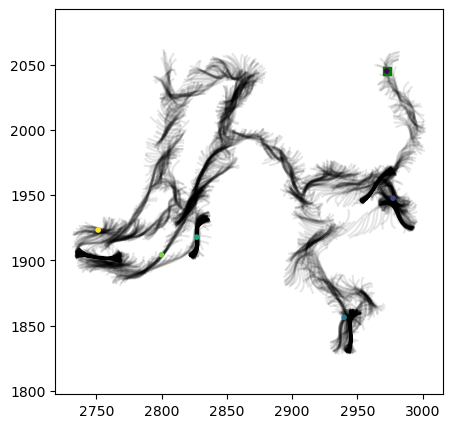

In [165]:
CLtrajectory_plotter(CL, XY, figsize=(5,5));
plt.scatter(*pd.DataFrame(XY).dropna().iloc[0], marker='s', c='green', zorder=5)
plt.scatter(XY[::500,0],XY[::500,1], marker='.', c=range(len(XY[::500,0])), cmap='viridis', zorder=5)
plt.axis('equal')
plt.show();

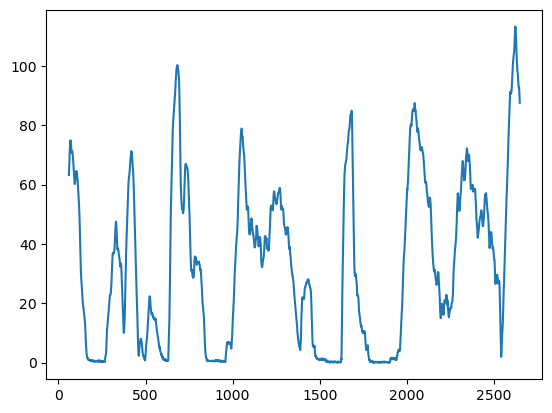

In [171]:
plt.plot(PG.velocity_dt60)
plt.show();

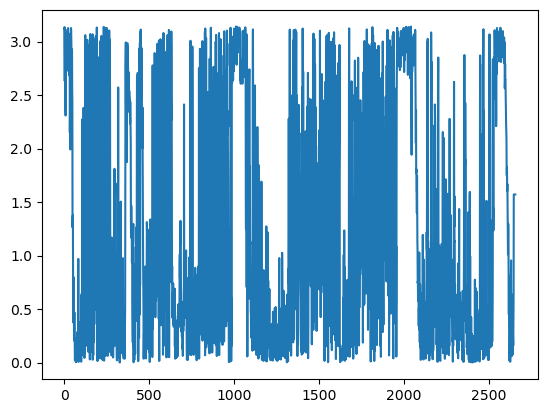

In [175]:
plt.plot(pd.DataFrame(movedir))
#plt.plot(PG.reversal_bin)
plt.show();

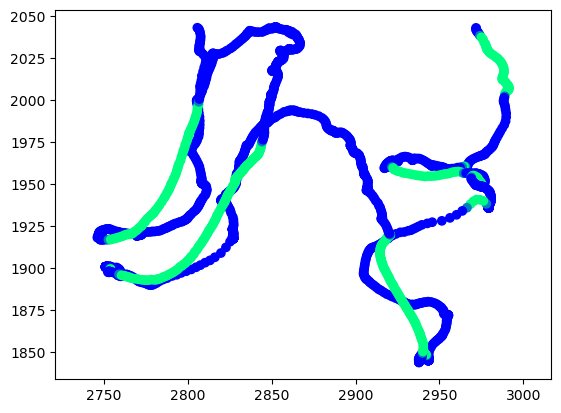

In [168]:
cmap = plt.get_cmap('winter')
line_colors = cmap(pd.DataFrame(reversal_bin).rolling(2).mean())
plt.scatter(XY[-len(pd.DataFrame(reversal_bin)):,0], XY[-len(pd.DataFrame(reversal_bin)):,1], c=line_colors)
plt.axis('equal')
plt.show();

In [981]:
def unitvector(xyarray, diff_step = 1):
    """
    Computes unit vectors and vector lengths from a 2D array of coordinates.
    
    Args:
        xyarray (np.ndarray): Input array of 2D coordinates (shape: [n_points, 2]).
    
    Returns:
        tuple: A tuple containing:
            - unit_vec (np.ndarray): Unit vectors corresponding to each coordinate.
            - vlen (np.ndarray): Vector lengths for each coordinate.
            - base (np.ndarray): Differences between consecutive coordinates.
    """
    base = xyarray[diff_step:] - xyarray[:-diff_step]
    vlen = np.linalg.norm(base, axis = 1).reshape(base.shape[0],1)
    unit_vec = np.divide(base,vlen)
    unit_vec = np.nan_to_num(unit_vec)
    return unit_vec, vlen/diff_step, base

def unitvector_space(xyarray, diffindex=[0,-1]):
    """
    Computes unit vectors and vector lengths for a given array of 2D points at a defined index.

    Args:
        xyarray (numpy.ndarray): A 2D array containing point coordinates.
        diffindex (list, optional): Indices for points to compute base vector from (default: [0, -1]).

    Returns:
        numpy.ndarray: Array of unit vectors.
        numpy.ndarray: Array of vector lengths.
        numpy.ndarray: Base vectors.
    """
    base = xyarray[:,diffindex[1]]-xyarray[:,diffindex[0]]
    vlen = np.linalg.norm(base, axis = 1).reshape(base.shape[0],1)
    unit_vec = np.divide(base,vlen)
    unit_vec = np.nan_to_num(unit_vec)
    return unit_vec, vlen, base


def AngleLen (v1, v2=None, hypotenuse = "v1", over="frames", v2_over = 'frames', v1_args={}, v2_args={}, v2_diff = 1, angletype=np.arccos):
    """
    Computes the length of the difference vector and the angle between two vectors.

    Args:
        v1 (numpy.ndarray): First vector (with 2D coordinates).
        v2 (numpy.ndarray, optional): Second vector (default: None).
        hypotenuse (str, optional): Determines which vector's length to use as the hypotenuse (default: "v1").
        over (str, optional): Specifies whether to compute over "frames" or "space" (default: "frames").
        **args: Additional arguments for unit vector computation, only applicable if over = "space".

    Returns:
        numpy.ndarray: Length of the difference vector.
        numpy.ndarray: Angle (in radians) between v1 and v2.
        numpy.ndarray: Difference vector (base vector).
    """
    func_dict = {'frames': unitvector,
                 'space': unitvector_space}
    
    v1_unitfunc = func_dict[over]
    v2_unitfunc = func_dict[v2_over]  
    v1_unit, v1_len, v1_diff = v1_unitfunc(v1,**v1_args)
    if not v2 is None:
        v2_unit, v2_len, v1_diff = v2_unitfunc(v2, **v2_args)
    else:
        v2_unit, v2_len, v1_diff = v1_unit[v2_diff:], v1_len[v2_diff:], v1_diff[v2_diff:]
    
    hyp = {"v1":v1_len, "v2":v2_len}
    hypo_len = hyp[hypotenuse]
    adjecent_len = hyp[[k for k in hyp.keys() if k != hypotenuse][0]]
    
    crop = min(len(v1_unit), len(v2_unit))
    
    dotProduct = v1_unit[:crop,0]*v2_unit[:crop,0] +v1_unit[:crop,1]*v2_unit[:crop,1]
    arccos = angletype(dotProduct) # mod of Vector is 1, so /mod can be left away  #arccos
    
    opposite_len = np.multiply(hypo_len[:crop].flatten(), abs(np.sin(arccos[:crop]))) #
    
    return opposite_len, arccos, v1_diff